In [1]:
# https://huggingface.co/mistralai/Mixtral-8x7B-Instruct-v0.1

In [3]:

def gcd(u, v):
    if v != 0:
        (u, v) = (v, u % v)
    return abs(u)

gcd(144, 12)

12

In [8]:
# demo NN
import numpy as np

x0 = np.array([[1], [0]])
w0 = np.array([[0, 1]])

y = x0 * w0

y

array([[0, 1],
       [0, 0]])

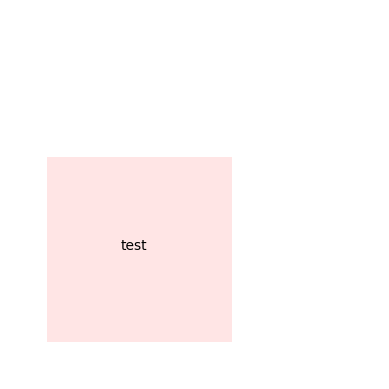

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

x=y=0.1
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
patch= ax1.add_patch(patches.Rectangle((x, y), 0.5, 0.5, alpha=0.1,facecolor='red',label='Label'))

centerx = x + 0.5/2 - 0.05
centery = y + 0.5/2

plt.axis('off')
plt.text(centerx, centery,'test')
plt.show()

## Simple NN Demo


In [21]:
# weight --- w1 ---- h1
#        \ /-----w2-/  \ w5 - output:
#        / \-----w3-\  / w6 - gender
# height --- w4 ---- h2

In [138]:
# https://victorzhou.com/blog/intro-to-neural-networks/
import numpy as np
import time

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.15
    epochs = 200 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 20 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

# training dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])

all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

start = time.time()
# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)
end = time.time()
print(f"execution time: {(end-start) * 10**3} ms")

Epoch 0 loss: 0.147
Epoch 20 loss: 0.047
Epoch 40 loss: 0.028
Epoch 60 loss: 0.020
Epoch 80 loss: 0.015
Epoch 100 loss: 0.012
Epoch 120 loss: 0.010
Epoch 140 loss: 0.008
Epoch 160 loss: 0.007
Epoch 180 loss: 0.006
execution time: 13.095617294311523 ms


In [139]:
# validation
# test data
testdata = np.array([
  [-3, -1],  # Rachel
  [21, 5],   # John
])

test_truth = np.array([
  1, # Rachel
  0, # John
])

test_preds = np.apply_along_axis(network.feedforward, 1, testdata)
loss = mse_loss(test_truth, test_preds)
print(f"validation loss: {loss}")

validation loss: 0.0056283013651685886


In [140]:
# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Emily: 0.936
Frank: 0.075


In [28]:
# how to prevent overfitting: https://programming-review.com/machine-learning/overfitting

In [144]:
import numpy as np
import time

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred[:,0,0]) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  '''
  def __init__(self):
    # Weights
    self.w0 = np.random.randn(2, 2)
    self.w1 = np.random.randn(2, 1)

    # Biases
    self.b0 = np.random.randn(1, 2)
    self.b1 = np.random.randn(1, 1)

  def feedforward(self, x):
      # x is a numpy array with 2 elements#
      h0 = sigmoid(np.dot(x, self.w0) + self.b0)
      o0 = sigmoid(np.dot(h0, self.w1) + self.b1)
      return o0

  def train(self, data, all_y_trues):
      '''
      - data is a (n x 2) numpy array, n = # of samples in the dataset.
      - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
      '''
      learn_rate = 0.15
      epochs = 200 # number of times to loop through the entire dataset
      
      for epoch in range(epochs):
          for x, y_true in zip(data, all_y_trues):
              # --- Do a feedforward (we'll need these values later)
              y_pred = self.feedforward(x)

              # backpropagation
              d_L_d_ypred = -2 * (y_true - y_pred)  # (1,2)
              h0pre = np.dot(x, self.w0) + self.b0
              h0 = sigmoid(h0pre)
              dL_b1 = d_L_d_ypred * deriv_sigmoid(np.dot(h0, self.w1) + self.b1)
              dL_w1 = dL_b1 * h0.T
              dL_b0 = dL_b1 * np.dot(deriv_sigmoid(h0pre), self.w1)  # (1,2)
              dL_w0 = dL_b0 * x
              
              # --- Update weights and biases
              self.w1 -= learn_rate * dL_w1
              self.b1 -= learn_rate * dL_b1
              self.w0 -= learn_rate * dL_w0
              self.b0 -= learn_rate * dL_b0
          # --- Calculate total loss at the end of each epoch
          if epoch % 20 == 0:
              y_preds = np.apply_along_axis(self.feedforward, 1, data)
              loss = mse_loss(all_y_trues, y_preds)
              print("Epoch %d loss: %.3f" % (epoch, loss))

# training dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])

all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

start = time.time()
# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)
end = time.time()
print(f"execution time: {(end-start) * 10**3} ms")

Epoch 0 loss: 0.213
Epoch 20 loss: 0.045
Epoch 40 loss: 0.032
Epoch 60 loss: 0.024
Epoch 80 loss: 0.019
Epoch 100 loss: 0.016
Epoch 120 loss: 0.014
Epoch 140 loss: 0.012
Epoch 160 loss: 0.010
Epoch 180 loss: 0.009
execution time: 36.1020565032959 ms


In [145]:
# Make some predictions
emily = np.array([-7, -3])
frank = np.array([20, 2]) 
print(f"Emily: {network.feedforward(emily)}")
print(f"Frank: {network.feedforward(frank)}")

Emily: [[0.94764341]]
Frank: [[0.08808194]]


In [147]:
# https://www.pragnakalp.com/generate-music-using-metas-musicgen-on-colab/
# https://til.simonwillison.net/machinelearning/musicgen
# https://huggingface.co/spaces/facebook/MusicGen

from transformers import pipeline
import scipy

synthesiser = pipeline("text-to-audio", "facebook/musicgen-small")

music = synthesiser("dark lo-fi music with an increasing drumbeat", forward_params={"do_sample": True})

scipy.io.wavfile.write("musicgen_out.wav", rate=music["sampling_rate"], data=music["audio"])


Using the model-agnostic default `max_length` (=1500) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.


In [ ]:
from transformers import AutoProcessor, MusicgenForConditionalGeneration
import scipy

processor = AutoProcessor.from_pretrained("facebook/musicgen-small")
model = MusicgenForConditionalGeneration.from_pretrained("facebook/musicgen-small")

def save(prompt, filename, num_tokens=1503):
    inputs = processor(
        text=[prompt],
        padding=True,
        return_tensors="pt",
    )
    audio_values = model.generate(**inputs, max_new_tokens=num_tokens)
    sampling_rate = model.config.audio_encoder.sampling_rate
    scipy.io.wavfile.write(filename, rate=sampling_rate, data=audio_values[0, 0].numpy())

save("trumpet mariachi frenetic excitement", "trumpet_mariachi.wav")

In [163]:
#(5724.69*4 + 26880 - 9300)/74297.99
#74297.99*0.5/14
#37000/0.4
39*40/40*25

975.0

In [6]:
# https://huggingface.co/BAAI/bge-m3
# test sentence similarity
lst = [0, 1, 2, 3]

print(lst[1:], lst[:1])

[1, 2, 3] [0]


In [17]:


def euclidrhythm(elementsleft, elementsright, lsep=0):
    lr = len(elementsright)
    ll = len(elementsleft)
    if lr < 2 and elementsleft[0] == elementsleft[-1]:
        return elementsleft, elementsright
    if lr > 1:
        elementsleft = [el + elementsright.pop() if idx < lr else el for idx, el in enumerate(elementsleft)]
        return euclidrhythm(elementsleft, elementsright, ll-lr+1)
    elementsright = [el for el in elementsleft[lsep:]]
    elementsleft = [el for el in elementsleft[:lsep]]
    return euclidrhythm(elementsleft, elementsright, lr)

def E(k, n):
    s = [[1] if i < k else [0] for i in range(n)]
    d = n - k
    n = max(k, d)
    k = min(k, d)
    z = d
    while z > 0 or k > 1:
        for i in range(k):
            s[i].extend(s[len(s) - 1 - i])
        s = s[:-k]
        z = z - k
        d = n - k
        n = max(k, d)
        k = min(k, d)
    return [item for sublist in s for item in sublist]

el = ['1'] * 5
er = ['0'] * 13
print(euclidrhythm(el, er))
print(''.join(map(str, E(5, 18))))

(['1000100', '1000100'], ['1000'])
100010010001001000


In [13]:
# https://huggingface.co/facebook/bart-large-cnn?text=Baseline+disease+severity+of+patients+with+Ulcerative+Colitis+influences+rapid+symptom+relief+under%0D%0Afilgotinib+treatment%3A+post+hoc+analysis+of+the+phase+2b%2F3+SELECTION+study%0D%0A%0D%0APlease+enter+text+to+be+summarized%3A+Background%3A+Filgotinib+%28FIL%29+is+an+oral%2C+once-daily%2C+Janus+kinase+1+preferential+inhibitor+approved+in+Europe+and+Japan+for+the+treatment+of+ulcerative+colitis+%28UC%29.+A+recent+analysis+of+SELECTION+trial+data+%28NCT02914522%29+showed+rapid+and+sustained+improvements+in+UC+symptoms+with+FIL+200+mg+%28FIL200%29+treatment+in+patients+with+moderate-to-severe+UC.1+Here+we+assess+symptomatic+remission+rates+over+time+with+FIL200+induction+treatment+according+to+baseline+UC+disease+severity+%28partial+Mayo+Clinic+Score+%5BpMCS%5D%29.+Methods%3A+SELECTION+was+a+phase+2b%2F3+randomized%2C+double-blind%2C+placebo-controlled+study.+Patients+aged+18%E2%80%9375+years+were+randomized+%282%3A2%3A1%29+to+receive+FIL200%2C+FIL+100+mg+or+placebo+once+daily+for+11+weeks+in+induction+study+A+%28biologic-naive+patients%29+or+induction+study+B+%28biologicexperienced+patients%29.+In+this+post+hoc+analysis%2C+proportions+of+patients+with+symptomatic+remission+%28Mayo+rectal+bleeding+sub-score+of+0+and+Mayo+stool+frequency+sub-score+of+%E2%89%A4+1%29%2C+from+days+2+to+15+and+weeks+2+to+10+of+the+induction+study%2C+were+analysed+at+each+timepoint+by+baseline+pMCS+%28pMCS+%E2%89%A57+and+pMCS+%3C7+%5Bcut-off+previously+used+for+severe+and+moderate+disease%2C+respectively%5D2%29.+Symptomatic+remission+rates+were+compared+between+the+pMCS+%E2%89%A57+and+pMCS+%3C7+groups+within+the+FIL200+and+placebo+arms+using+a+Cochran%E2%80%93Mantel%E2%80%93Haenszel+test+adjusted+by+study+randomization+stratification+factors.+Nominal+p+values+%3C0.05+were+considered+statistically+significant.+Results%3A+At+day+2%2C+symptomatic+remission+rates+with+FIL200+treatment+were+significantly+higher+in+patients+with+baseline+pMCS+%3C7+than+in+those+with+baseline+pMCS+%E2%89%A57+%288.4%25+vs+1.1%25%2C+p%3D0.009+%5Binduction+study+A%5D%3B+8.8%25+vs+0.7%25%2C+p%3D0.004+%5Binduction+study+B%5D%29+%28Figure+A+and+B%29.+From+days+2+to+15%2C+symptomatic+remission+rates+increased+in+both+groups+and%2C+except+for+day+7+for+induction+study+A+and+day+9+for+induction+study+B%2C+continued+to+be+significantly+higher+in+those+with+baseline+pMCS+%3C7.+From+week+2%2C+symptomatic+remission+rates+with+FIL200+treatment+generally+continued+to+increase+in+both+pMCS+%E2%89%A57+and+pMCS+%3C7+groups+%28Figure+C+and+D%29.+By+week+10%2C+symptomatic+remission+rates+with+FIL200+treatment+were+no+longer+significantly+different+between+those+with+baseline+pMCS+%3C7+and+those+with+baseline+pMCS+%E2%89%A57+%2854.8%25+vs+43.3%25%2C+p%3D0.124+%5Binduction+study+A%5D%3B+39.5%25+vs+26.4%25%2C+p%3D0.099+%5Binduction+study+B%5D%29.+Conclusion%3A+Symptomatic+response+to+FIL200+occurs+more+rapidly+in+patients+with+lower+UC+disease+severity+than+in+those+with+higher+UC+disease+severity.+However%2C+converging+response+rates+over+10+weeks+of+treatment+leads+to+symptomatic+remission+regardless+of+baseline+UC+disease+severity

from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

#ARTICLE = """ xxxx
#"""
ARTICLE = input("Please enter text to be summarized:")
print(summarizer(ARTICLE, max_length=200, min_length=130, do_sample=False))

Please enter text to be summarized: Baseline disease severity of patients with Ulcerative Colitis influences rapid symptom relief under filgotinib treatment: post hoc analysis of the phase 2b/3 SELECTION study  Please enter text to be summarized: Background: Filgotinib (FIL) is an oral, once-daily, Janus kinase 1 preferential inhibitor approved in Europe and Japan for the treatment of ulcerative colitis (UC). A recent analysis of SELECTION trial data (NCT02914522) showed rapid and sustained improvements in UC symptoms with FIL 200 mg (FIL200) treatment in patients with moderate-to-severe UC.1 Here we assess symptomatic remission rates over time with FIL200 induction treatment according to baseline UC disease severity (partial Mayo Clinic Score [pMCS]). Methods: SELECTION was a phase 2b/3 randomized, double-blind, placebo-controlled study. Patients aged 18–75 years were randomized (2:2:1) to receive FIL200, FIL 100 mg or placebo once daily for 11 weeks in induction study A (biologic-nai

[{'summary_text': 'Filgotinib (FIL) is an oral, once-daily, Janus kinase 1 preferential inhibitor approved in Europe and Japan for the treatment of ulcerative colitis (UC) A recent analysis of SELECTION trial data (NCT02914522) showed rapid and sustained improvements in UC symptoms with FIL 200 mg (FIL200) treatment in patients with moderate-to-severe UC. In this post hoc analysis, proportions of patients with symptomatic remission (Mayo rectal bleeding sub-score of 0 and Mayo stool frequency sub- score of ≤ 1) were analysed at each timepoint by baseline pMCS. Symptomatic response to FIL200 occurs more rapidly in. patients with lower UC disease severity than in those with higher UC. disease severity.'}]
